# Image Denoising
Esteban Sierra Baccio

## Setup (imports, seed, GPU check)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling3D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

## Dataset loading & exploration

In [2]:
# Cargar MINST
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

## Noise generation & visualization

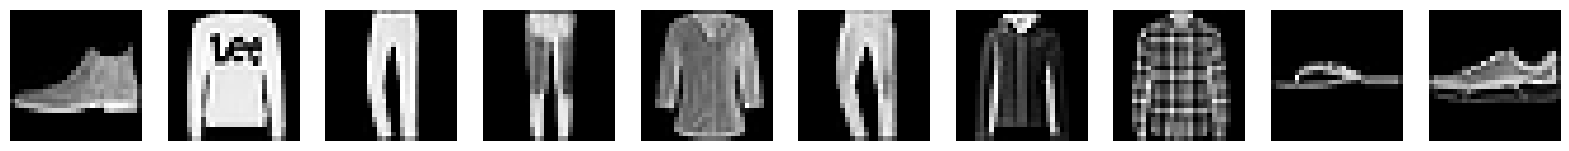

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

## AutoEncoder design (Dense or CNN)

In [3]:
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(28 * 28, activation='sigmoid')(x)
output_img = Reshape((28, 28, 1))(x)

dense_autoencoder = Model(input_img, output_img)
dense_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

dense_autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.3666 - val_loss: 0.3116
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.3023 - val_loss: 0.2989
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2939 - val_loss: 0.2945
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2893 - val_loss: 0.2897
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2861 - val_loss: 0.2868
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2836 - val_loss: 0.2845
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2816 - val_loss: 0.2828
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2800 - val_loss: 0.2814
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2787 - val_loss: 0.2806
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2776 - val_loss: 0.2794


## Training with callbacks (EarlyStopping recommended)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2762

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2767 - val_loss: 0.2786
Epoch 2/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2759

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2758 - val_loss: 0.2778
Epoch 3/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2752

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2753 - val_loss: 0.2771
Epoch 4/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2743

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2746 - val_loss: 0.2766
Epoch 5/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2747

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2740 - val_loss: 0.2760
Epoch 6/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2735

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2736 - val_loss: 0.2757
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2731 - val_loss: 0.2759
Epoch 8/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2726

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2727 - val_loss: 0.2748
Epoch 9/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2724

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2723 - val_loss: 0.2746
Epoch 10/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2723

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2720 - val_loss: 0.2742
Epoch 11/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2714

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2716 - val_loss: 0.2738
Epoch 12/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2711

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2713 - val_loss: 0.2735
Epoch 13/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2714

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2710 - val_loss: 0.2733
Epoch 14/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2709

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2707 - val_loss: 0.2729
Epoch 15/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2704 - val_loss: 0.2732
Epoch 16/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2697

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2701 - val_loss: 0.2725
Epoch 17/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2697

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2700 - val_loss: 0.2722
Epoch 18/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2697

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2697 - val_loss: 0.2720
Epoch 19/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2698

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2695 - val_loss: 0.2717
Epoch 20/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2696

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2693 - val_loss: 0.2717
Epoch 21/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2691

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2691 - val_loss: 0.2714
Epoch 22/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2694

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2690 - val_loss: 0.2713
Epoch 23/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2684

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2687 - val_loss: 0.2711
Epoch 24/50
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2687

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2687 - val_loss: 0.2711
Epoch 25/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2678

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2684 - val_loss: 0.2709
Epoch 26/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2681

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2683 - val_loss: 0.2708
Epoch 27/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2686

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2681 - val_loss: 0.2705
Epoch 28/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2680 - val_loss: 0.2707
Epoch 29/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2679

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2679 - val_loss: 0.2702
Epoch 30/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2675

235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2678 - val_loss: 0.2702
Epoch 31/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2680

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2677 - val_loss: 0.2701
Epoch 32/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2674

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2675 - val_loss: 0.2699
Epoch 33/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2673

235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2675 - val_loss: 0.2697
Epoch 34/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2673 - val_loss: 0.2698
Epoch 35/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2672 - val_loss: 0.2697
Epoch 36/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2667

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.2671 - val_loss: 0.2695
Epoch 37/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2670 - val_loss: 0.2696
Epoch 38/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2666

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2669 - val_loss: 0.2694
Epoch 39/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2669 - val_loss: 0.2697
Epoch 40/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2668 - val_loss: 0.2696
Epoch 41/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2664

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2667 - val_loss: 0.2693
Epoch 42/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2668

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2666 - val_loss: 0.2690
Epoch 43/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2661

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2665 - val_loss: 0.2690
Epoch 44/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2665 - val_loss: 0.2690
Epoch 45/50
230/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2668

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2664 - val_loss: 0.2689
Epoch 46/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2662

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2663 - val_loss: 0.2687
Epoch 47/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2663 - val_loss: 0.2689
Epoch 48/50
231/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2666

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2662 - val_loss: 0.2687
Epoch 49/50
232/235 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2662

235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2661 - val_loss: 0.2686
Epoch 50/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2660 - val_loss: 0.2687
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


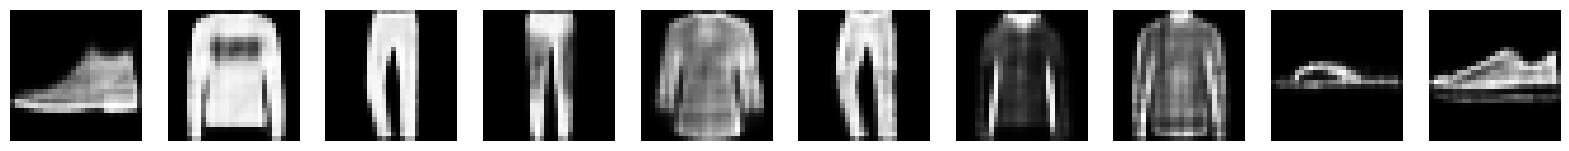

In [5]:
# Training with callbacks to save the best model
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_dense_autoencoder.h5', monitor='val_loss', save_best_only=True, mode='min')
dense_autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test), callbacks=[checkpoint])
dense_autoencoder.load_weights('best_dense_autoencoder.h5')
decoded_imgs = dense_autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off') 

## Evaluation (MSE, optional PSNR) + visual grid

In [ ]:
# Evaluate the model with MSE loss

loss = dense_autoencoder.evaluate(x_test, x_test)
print(f'Test Loss: {loss}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2686
Test Loss: 0.26859959959983826


## Anomaly detection using reconstruction error

## Conclusions & insights